# HW6 - Neural Network by `tf.keras`
##### 負責助教：張逸群 toosyou.tw@gmail.com

> 本次作業將使用 **Fashion-MNIST** 時尚資料集並以 `tf.keras` 設計 Neural Network 以進行衣物、鞋子及包包的辨識

---
    
## [資料簡介](https://github.com/zalandoresearch/fashion-mnist)

Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples.  
Each example is a 28x28 grayscale image, associated with a label from 10 classes.  
We intend Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms.  
It shares the same image size and structure of training and testing splits.

---

#### 姓名：阮柏愷
#### 學號：0810809

## Packages that Might Be Used

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets.fashion_mnist import load_data

from sklearn.metrics import classification_report

%matplotlib inline

### 相關連結

* Packages
    * [numpy](http://www.numpy.org/)
    * [pandas](https://pandas.pydata.org/)
    * [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
    * [pyplot](https://matplotlib.org/tutorials/introductory/pyplot.html)
    * [tf.keras](https://www.tensorflow.org/api_docs/python/tf/keras)
    * [tf.keras.datasets.fashion_mnist.load_data](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/fashion_mnist/load_data)
    * [tf.keras.utils.to_categorical](https://www.tensorflow.org/api_docs/python/tf/keras/utils/to_categorical)
    * [sklearn.metrics.classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)
* Markdown
    * jupyter 可以支援 markdown 區塊，方便打上文字說明此份 notebook 在做的事情
    * [wiki](https://zh.wikipedia.org/wiki/Markdown)
    * [教學](https://markdown.tw/)

## Load Data - 5%

#### 請使用 `tf.keras.datasets.fashion_mnist` 中提供的 `load_data` 函式讀取資料 - 5%

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

X_train.shape, y_train.shape, X_test.shape, y_test.shape

4423680/4422102 [==============================] - 0s 0us/step


((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

> 由此可見 `fashion_mnist.load_data` 已將 training set 與 testing set 分好了，  
> 一般是為了使各研究可以有一致的分割，因此這做法在公開資料集中非常常見

## Data Visualization - 25%

#### 請將 `X_train` 中的前二十五筆資料，使用 `plt.subplots` 以 $5\times5$ 排列畫製 - 10%
* [Hint](https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplot_toolbar.html#sphx-glr-gallery-subplots-axes-and-figures-subplot-toolbar-py)

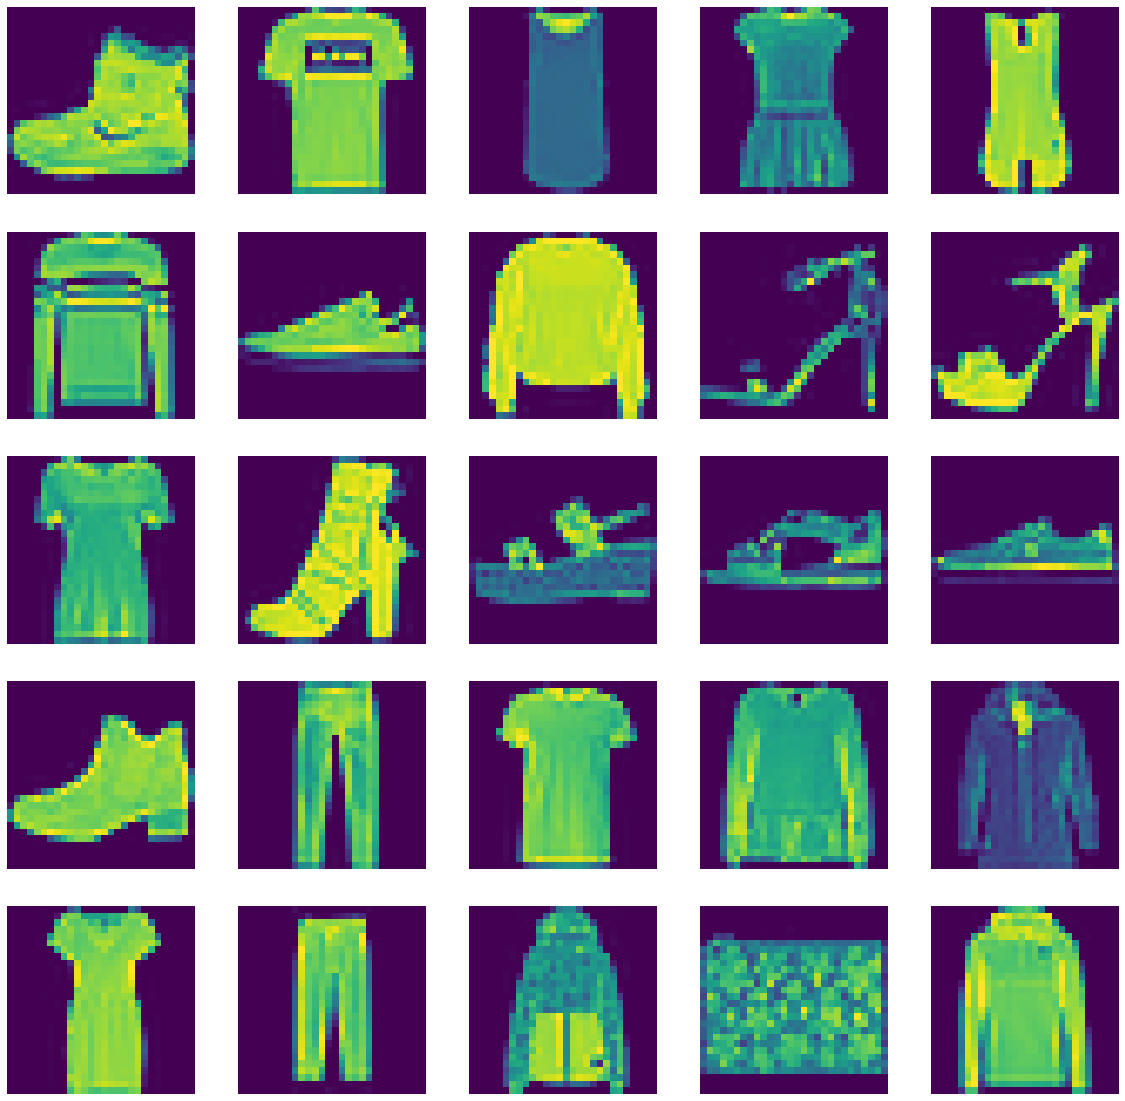

In [3]:
image_example_plot = X_train[:25]

plt.figure(figsize=(20, 20))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(image_example_plot[i])
    plt.axis("off")

#### 請回答以下問題 - 5%

1. 請問上方的圖，紫色的部分（背景）其數值為何？
    * 0

#### 請將 `X_train` 依照分類（`y_train`）分開，並將各分類取平均並繪製成 $2\times5$ 的圖 - 10%

* 假設某分類 $X$ 具有 $N$ 筆資料，第 $i$ 筆資料為 $X_i$，其中
$$
X_i = [ X_{i, 0, 0}, X_{i, 0, 1}, \cdot X_{i, 28, 28} ]^T
$$
* 該分類的平均 $\overline{X}$ 便為
$$
\overline{X} = [ \overline{X_{0, 0}}, \overline{X_{0, 1}}, \cdot \overline{X_{28, 28}} ]^T
$$
where,
$$
\overline{X_{a, b}} = \frac{\sum^{N-1}_{i=0}{X_{i, a, b}}}{N}, \\
\text{for  }0 \le a, b \le 27
$$

* [Hint](https://numpy.org/doc/stable/reference/generated/numpy.mean.html)

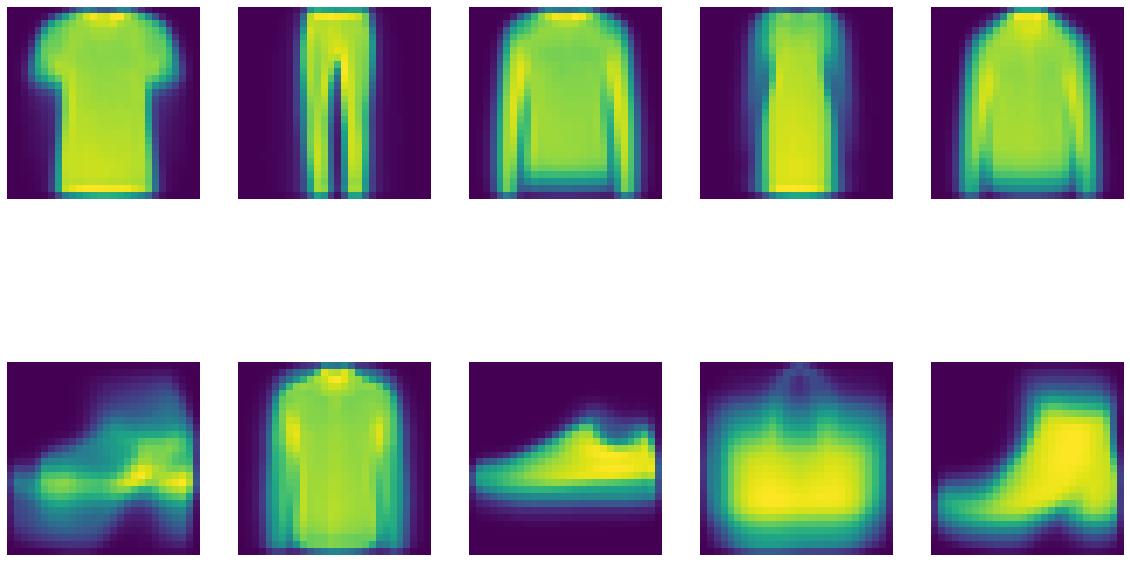

In [4]:
uni_category = np.unique(y_train)
image_average = []

for i in uni_category:
    same_cate_image = X_train[y_train == i]
    image_average.append(np.mean(same_cate_image, axis=0))


plt.figure(figsize=(20, 12))    
for i in uni_category:
    plt.subplot(2, 5, i + 1)
    plt.imshow(image_average[i])
    plt.axis("off")

## Preprocessing - 20%


#### 請將 `X_train` reshape 成 `(60000, 784)` 並將 `X_test` reshape 成 `10000, 784` - 5%

* 此步是為了符合後面 Neural Network 的 input 格式

In [5]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test  = X_test.reshape(X_test.shape[0], -1)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 784), (60000,), (10000, 784), (10000,))

#### 請使用 `tensorflow.keras.utils.to_categorical` 將 `y_train` 及 `y_test` 轉換成 [**one-hot**](https://zh.wikipedia.org/wiki/One-hot) 形式 - 5%

In [6]:
y_train = to_categorical(y_train,
                         num_classes=10)
y_test  = to_categorical(y_test,
                         num_classes=10)

y_train.shape, y_test.shape

((60000, 10), (10000, 10))

In [7]:
y_train[:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

#### 請回答以下問題 - 10%

1. 請問什麼是 one-hot 格式？
    * One hot encoding will encode the number in to array. The length of the array is num_class. Only the class of index will be 1 other will be assigned to 0.

## Model Construction - 25%

#### 請建造一個 [Multilayer Perceptron (MLP)](https://zh.wikipedia.org/zh-tw/%E5%A4%9A%E5%B1%82%E6%84%9F%E7%9F%A5%E5%99%A8)，並符合以下規格 - 5%

* [請使用 `tf.keras.Sequential` 進行 model 定義](https://tf.wiki/en/basic/models.html#use-keras-sequential-functional-api-to-build-models)
* 該 model 總共具有 $4$ 層 (layer)
    1. [Input](https://www.tensorflow.org/api_docs/python/tf/keras/Input) ，並設定 shape 為 `(784, )`
    2. [Dense](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense) ，任意設定 `units` 數量，並設定 `activation` 為 `relu`
    3. [Dense](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense) ，任意設定 `units` 數量，並設定 `activation` 為 `relu`
    4. [Dense](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense) 作為 output layer，設定 `unit` 為 output shape 的 `10`，並設定 `activation` 為 `softmax`

In [8]:
model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(784,)))
model.add(tf.keras.layers.Dense(256, activation="relu"))
model.add(tf.keras.layers.Dense(128, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

#### 請對 `model` 進行 [`compile`](https://www.tensorflow.org/api_docs/python/tf/keras/Model#compile) - 5%

* 設定 `loss` 為 `CategoricalCrossentropy`
* 設定 `metrics` 為 `['acc']`

In [9]:
loss_fn = tf.keras.losses.CategoricalCrossentropy()
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=["acc"])
model.summary() # print out the model

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


#### 請使用 `X_train` 及 `y_train` 對 `model` 進行訓練 - 5%

* [Hint](https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit)
* 請調整 `batch_size` 及 `epochs`
* 設定 `validation_split` 為 0.1

In [10]:
model.fit(X_train, y_train,
          batch_size=32, epochs=10,
          validation_split=0.1)

Epoch 1/10
1688/1688 [==============================] - 5s 2ms/step - loss: 2.5004 - acc: 0.7574 - val_loss: 0.7147 - val_acc: 0.7873
Epoch 2/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.6033 - acc: 0.8049 - val_loss: 0.5521 - val_acc: 0.8143
Epoch 3/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.5471 - acc: 0.8155 - val_loss: 0.5144 - val_acc: 0.8205
Epoch 4/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.4971 - acc: 0.8291 - val_loss: 0.5046 - val_acc: 0.8180
Epoch 5/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.4572 - acc: 0.8415 - val_loss: 0.4875 - val_acc: 0.8288
Epoch 6/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.4210 - acc: 0.8495 - val_loss: 0.4159 - val_acc: 0.8547
Epoch 7/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3963 - acc: 0.8579 - val_loss: 0.4211 - val_acc: 0.8595
Epoch 8/10
1688/1688 [==============================] - 4s 2ms

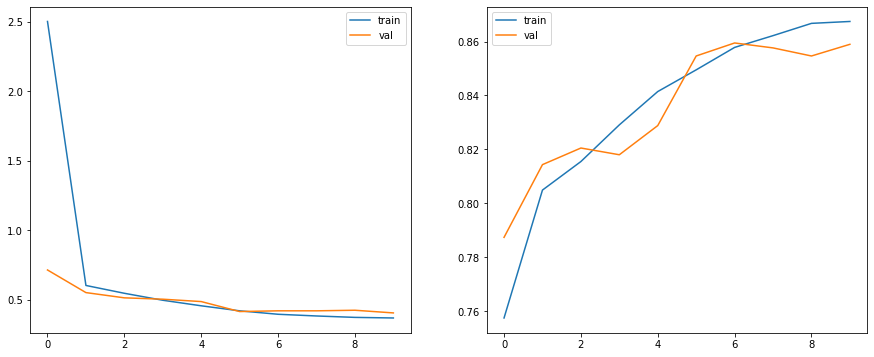

In [19]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.plot(model.history.history["loss"],
         label="train")
plt.plot(model.history.history["val_loss"],
         label="val")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(model.history.history["acc"],
         label="train")
plt.plot(model.history.history["val_acc"],
         label="val")
plt.legend()

#### 請回答以下問題 - 10%

1. 請問是否有 **overfitting** 的狀況？
    * 並無
2. 何以得知？
    * 從上面的圖形來看，隨著 epoch 數愈來愈多，val loss 和 val acc 都有進步。

## Evaluation - 5%

#### 請使用 `classification_report` 對 testing set 進行 evaluation - 5%

* 注意 `model` 的預測將會是十個數字（對應各個分類的機率），請以其中最大值的分類作為預測
* `y_test` 已是 **one-hot** 形式，須自行進行轉換

In [20]:
y_prob = model.predict(X_test)
y_classes = y_prob.argmax(axis=-1)

In [21]:
print(classification_report(y_test.argmax(axis=-1), y_classes))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81      1000
           1       0.97      0.96      0.97      1000
           2       0.75      0.74      0.75      1000
           3       0.83      0.87      0.85      1000
           4       0.77      0.76      0.77      1000
           5       0.96      0.95      0.96      1000
           6       0.62      0.62      0.62      1000
           7       0.88      0.97      0.93      1000
           8       0.95      0.97      0.96      1000
           9       0.97      0.89      0.93      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



## Prediction - 20%

#### 請使用圖片編輯器（如 [photopea](http://photopea.com/)），修改一商品的圖片以符合 model 需求，對其進行預測 - 10%

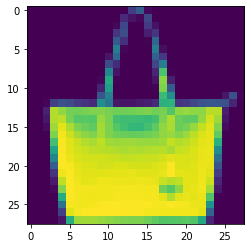

In [27]:
new_data = (1 - plt.imread("bag.png").mean(axis=-1))
plt.imshow(new_data)

In [28]:
new_data = new_data.reshape(1, 784)
model.predict(new_data)

array([[0.12200127, 0.04968742, 0.15359007, 0.14478226, 0.05432578,
        0.11465896, 0.1785398 , 0.08952958, 0.0686258 , 0.02425906]],
      dtype=float32)

In [29]:
model.predict(new_data).argmax(-1)

array([6])

#### 請回答以下問題 - 10%

1. 請問預測是否正確？
    * 不正確
2. 你覺得是為什麼？
    * 在訓練的部分可能有待加強。特別是類別6的score的都非常低，代表訓練時有很多錯誤的判別。

## 有什麼想對助教說的嗎？

### Gura 敲鼓讓他跑快一點

![](https://walfiegif.files.wordpress.com/2020/12/out-transparent-2.gif?w=870)